In [26]:
import os
from PIL import Image
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, image_dir, label_dir, transform=None):
        self.image_dir = image_dir
        self.label_dir = label_dir
        self.transform = transform
        self.images = os.listdir(image_dir)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_name = self.images[idx]
        img_path = os.path.join(self.image_dir, img_name)
        # 이미지 파일 이름에서 확장자를 제거하고, 레이블 파일 경로를 생성
        label_path = os.path.join(self.label_dir, os.path.splitext(img_name)[0] + '.txt')

        image = Image.open(img_path).convert('RGB')
        with open(label_path, 'r') as file:
            label = file.readline().strip()  # 첫 번째 줄에 레이블이 있다고 가정

        if self.transform:
            image = self.transform(image)

        return image, label



In [27]:
from torchvision import transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.Resize((320, 320)),
    transforms.ToTensor()
])

dataset = CustomDataset(image_dir='data/images', label_dir='data/labels', transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [28]:
import os

def count_files(directory):
    return len([name for name in os.listdir(directory) if os.path.isfile(os.path.join(directory, name))])

images_count = count_files('/home/minyoungxi/MINYOUNGXI/Project/MobileNet/data/images')
labels_count = count_files('/home/minyoungxi/MINYOUNGXI/Project/MobileNet/data/labels')

print(f"Number of files in images folder: {images_count}")
print(f"Number of files in labels folder: {labels_count}")

import os

images_dir = '/home/minyoungxi/MINYOUNGXI/Project/MobileNet/data/images'
labels_dir ='/home/minyoungxi/MINYOUNGXI/Project/MobileNet/data/labels'

# 이미지 파일 리스트
image_files = os.listdir(images_dir)

# 레이블이 없는 이미지 찾기
for image_file in image_files:
    # 파일 확장자를 제외한 파일 이름 추출
    file_name = os.path.splitext(image_file)[0]

    # 해당하는 레이블 파일의 경로 생성
    label_file = file_name + '.txt'
    label_path = os.path.join(labels_dir, label_file)

    # 레이블 파일이 존재하지 않으면 출력
    if not os.path.exists(label_path):
        print(f"Label missing for image: {image_file}")


Number of files in images folder: 928
Number of files in labels folder: 928


In [29]:
import os

def get_file_names_without_extension(directory):
    return {os.path.splitext(file)[0] for file in os.listdir(directory) if os.path.isfile(os.path.join(directory, file))}

images_dir = '/home/minyoungxi/MINYOUNGXI/Project/MobileNet/data/images'
labels_dir = '/home/minyoungxi/MINYOUNGXI/Project/MobileNet/data/labels'

# 확장자를 제외한 파일 이름의 집합을 얻음
image_names = get_file_names_without_extension(images_dir)
label_names = get_file_names_without_extension(labels_dir)

# 레이블이 없는 이미지 파일 찾기
images_without_labels = image_names - label_names
# 이미지가 없는 레이블 파일 찾기
labels_without_images = label_names - image_names

print(f"Images without labels: {images_without_labels}")
print(f"Labels without images: {labels_without_images}")


Images without labels: set()
Labels without images: set()


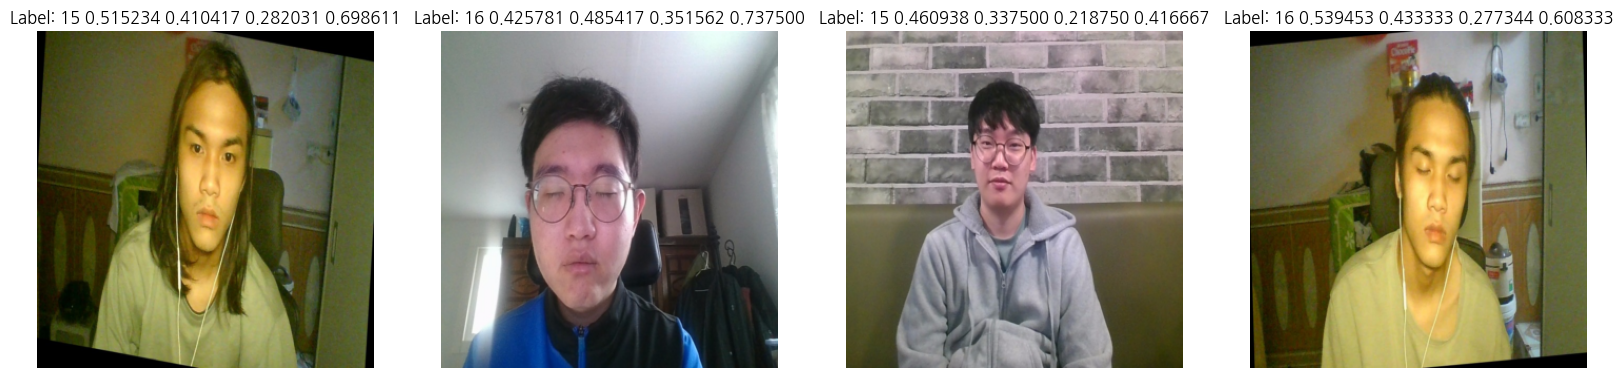

In [33]:
import matplotlib.pyplot as plt

# 데이터셋에서 이미지 몇 개를 불러와서 시각화
def show_images(dataloader, num_images=4):
    fig, axs = plt.subplots(1, num_images, figsize=(20, 10))
    for i, (image, label) in enumerate(dataloader):
        if i == num_images: 
            break
        img = image[0].numpy().transpose((1, 2, 0))
        axs[i].imshow(img)
        axs[i].set_title(f'Label: {label[0]}')
        axs[i].axis('off')

# 데이터 로더 생성
dataset = CustomDataset(image_dir='data/images', label_dir='data/labels', transform=transform)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

# 이미지 시각화
show_images(dataloader)
